<a href="https://colab.research.google.com/github/santes21/IMT-344_VISION_ARTIFICIAL/blob/main/Lab_1_Introduction_to_Digital_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory 1:** Introduction to Digital Image Processing

Welcome to the first laboratory of the course IMT-344! Here, you'll dive into the fundamentals of Digital Image Processing (DIP) using some of the most popular tools in the field. Nowadays, frameworks and tools based on the Python programming language have become advantageous when it comes to creating computer vision systems. In contrast with other programming languages, Python plays a significant role in Artificial Intelligence (AI) due to its numerous benefits, such as its simplicity, ease of readability and writing, robust community support, and the availability of deep learning frameworks. Nowadays, libraries such as Numpy, Pandas, TensorFlow, PyTorch are the basis for creating modern computer vision systems. In the following sections, you will see a better explained introduction to each of these tools. Then, we introduce the application of basic point processing functions and colour transformation.

<center><img src='https://media.giphy.com/media/26FL4XfQvGkcYfMD6/giphy.gif' width='30%'></center>

# 1. Colab

The first tool, Colab, is used to program Jupyter Notebooks in the cloud. This is quite useful when one does not have the local hardware resources required to program computer vision algorithms.

For those who have never worked with Jupyter Notebooks: Basically, this tool consists of a document that allows you to write, document and execute code, visualize data, perform calculations and see the results in multiple cells that can contain Python code or text.

The extension of a notebook is `.ipynb`, and the Colab platform makes it very easy to save these files into the cloud (on Gdrive). The `+ Code` button, located at the bottom of each cell, will allow you to create a new cell for Python code. On the other hand, `+ Text` will allow you to create a text cell in which you can add descriptions and texts like in the present cell.

You can visit the following resource __[The Colab Base Tutorial](https://colab.research.google.com/notebooks/intro.ipynb)__ to see more Colab's details and features.

## 1.1 Importing libraries
As you already now, libraries are collections of functions and resources that let us focus on the important tasks, instead of focusing on reinventing the wheel. The following libraries are some of the libraries we will use in this course:


In [ ]:
# Numpy is the core library for computing in Python. It provides a
# high-performance multidimensional array object, and tools for working with
# these arrays. For example, consider that a list of lists in Python, would
# take at least 20 MB or so, while a NumPy 3D array with single-precision floats
# would fit in 4 MB.
import numpy as np

# matplotlib.pyplot is a basic module to display images in a notebook.
# The %matplotlib inline instruction let Jupyter notebooks show images inside
# the output of the cells. Remember this line if you don't see any image or
# plot showing up after the execution of a cell.
import matplotlib.pyplot as plt
%matplotlib inline

# The matplotlib.image module is one of many ways to open images in notebooks.
# We usually import it as mpimg.
import matplotlib.image as mpimg

# CV2 is the implementation of the OpenCV Library in Python. The original version
# of OpenCV was implemented in C/C++. Later, this C/C++ implementation was embedded
# in Python due to its growing popularity for many ML/Data Science tools. Therefore,
# note that most of the OpenCV functions we will use in Python are also available
# in C++, which will be useful for the development of embedded systems.
import cv2

# The requests library let us perform web requests (get, post, put, delete),
# meaning that it can retrieve data/images from websites and web services.
import requests

# Both OS and shutil are important for file management. The latter also has functions to
# create, write, and read zip files.
import os
import shutil

# google.colab.files contains a collection of functions to interact with
# internal/external using code. E.g. upload a file from your computer
# google.colab.drive let us mount a gdrive account to the local Colab notebook.
from google.colab import files, drive

##1.2 Open an image with `matplotlib`

Currently, there are many libraries to process and display images in python scripts and notebooks, however, `mpimg` and `opencv` are the most used ones. We will frequently use both and explore other methods in future laboratories.  

In [ ]:
# Upload an image from your computer to the Colab's OS
# You can see all the uploaded files inside the "Files" section in the left-side menu
uploaded = files.upload()

Saving obama-elon.jpeg to obama-elon.jpeg


<class 'numpy.ndarray'>


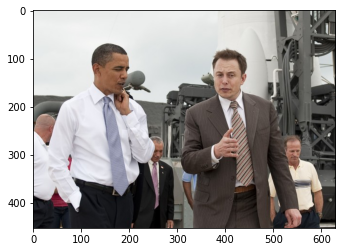

In [ ]:
# Once an image was uploaded, you need to import it into the present notebook.
# This time, we will use mpimg to complete this task
image = mpimg.imread('obama-elon.jpeg')

# Print the image's type of variable.
print(type(image))

# Display the image
plt.imshow(image)

You will see that the opened image is saved in a Numpy array. Most image processing tools in Python use this data structure with the following setup `[Height, Width, Channel] `.

##1.3 Open an image with `opencv`

Saving obama-elon2.jpeg to obama-elon2.jpeg
<class 'numpy.ndarray'>


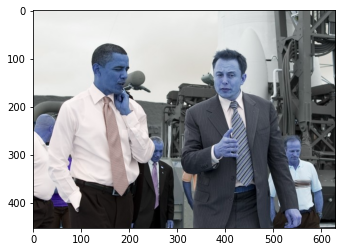

In [ ]:
uploaded = files.upload()

image2 = cv2.imread('obama-elon2.jpeg')

# Print the image's type of variable
print(type(image2))

# Display the image
plt.imshow(image2)

Ops! the latter seems an image with weird colours. This is because the `imread` function of OpenCV imports images in the BGR colour space, which considers that images' channels are in different order. Instead, we should always aim to use the RGB space.

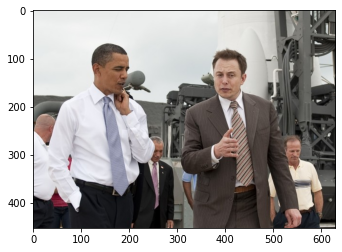

In [ ]:
# We need to convert the image to RGB
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

plt.imshow(image2)

# 2. Colab's Additional Features


## 2.1 Mount your GDrive account for extra storage
Since you already have a Google account with +15Gb of storage, it wouldn't be a bad idea to save and retrieve your images using Gdrive. Then, we will mount Gdrive to the current notebook with `drive.mount`. Note that you should pass the path where gdrive will be mounted inside the Colab's filesystem. Take care of this new folder because it contains all your files on Gdrive, and a change to it will be reflected on your Gdrive account.


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Running the previous cell will ask you to login in your Gmail account. You are now able to access your Google Drive files under: `/content/gdrive/My Drive/`.

## 2.2 Run Bash Commands

Notebooks in Python let us run terminal commands to interact with the operative system (OS). In the case of Colab, the OS is based on Ubuntu, therefore, we should always use Linux commands. This can be performed inside the cells by starting a command with the character *!*. Try to install your favorite library and check if its commands are available after the installation. For example, to download a library:

In [ ]:
!apt-get install docker

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

Now, it is important to notice that any bash command started with *!* will only perform actions inside a cell, so all implemented changes will only be applied in that cell and not in the entire notebook. To change anything in the complete notebook, you can use the percent symbol *%*. For instance, the following command changes the current folder for the entire notebook.

In [ ]:
%cd Drive

/content/Drive


## 2.3 Activate GPU and TPU
Colab asigns normal CPU and RAM to every session by default. However, in future notebooks, you will notice computer vision processing gets quite demanding, so we will have to move from CPU to GPU when needed. Given that GPU is only available for 12 hours, will have to keep this in mind when running algorithms for a long time. You have to follow the next steps to activate GPU in a notebook:

Click on: “Runtime” → “Change runtime type” → “Hardware accelerator”. Then select the desired hardware.

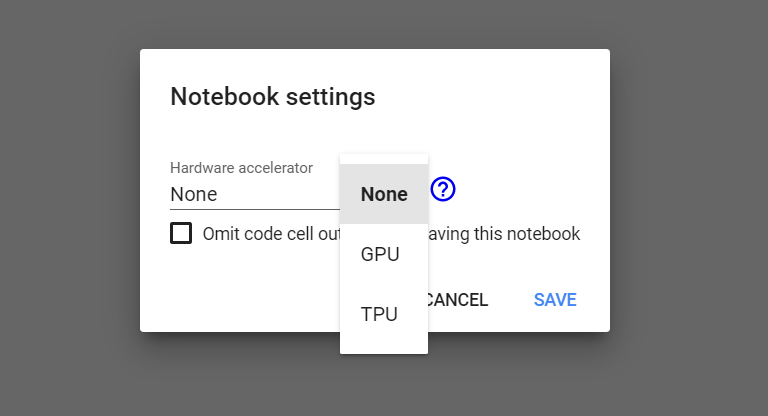



##2.4 Save and compress images

Saving the resulting images after processing them will be an important step. You can do in the following way:

In [ ]:
# Write the image inside a new file
# Note: Since OpenCV considers the image is in the BGR colour space, we need to
# convert back it before saving the image
cv2.imwrite("new_image.jpg", cv2.cvtColor(image2, cv2.COLOR_RGB2BGR))

In [ ]:
%cd /content/
files.download('new_image.jpeg')

You can also compress the image (or multiple images) inside a folder:

In [ ]:
# Move the image to the Drive folder
!mkdir new_folder
!mv new_image.jpeg new_folder/new_image.jpeg

Make a zip file of your `new_folder` folder

In [ ]:
shutil.make_archive("new_folder", 'zip', "/content","/content/new_folder")

Downloading data from Colab

In [ ]:
files.download('new_folder.zip')

# 3. OpenCV

As mentioned above, OpenCV is one of the main libraries for working with image processing and computer vision nowadays.  By working with it, one can process images and videos to identify objects, faces, or even a person's handwriting. From now on, will focus on working with images and this library.

## 3.1 Working in the RGB color space
Images are usually saved in the RGB format, so you can think of then as 3D cubes. In Python, they will be opened in numpy arrays with 3 dimensions that mean `width, height, and depth`. To better explore this idea, we will separate and visualize the channels of an image:

2250000
(750, 1000, 3)
uint8


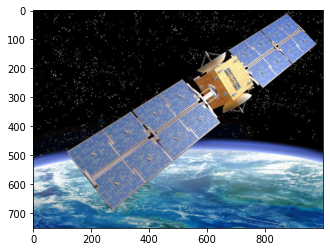

In [ ]:
# Open an image and visualise it
import cv2
import matplotlib.pyplot as plt

input_image=cv2.imread('satellite.jpeg')
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)

# Show some properties of the image
print(input_image.size)
print(input_image.shape)
print(input_image.dtype)

# Show the image
plt.imshow(input_image)

In [ ]:
# Note that the image contains discrete values in the range of [0,255]
input_image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 11,  64, 132],
        [ 48, 101, 169],
        [ 33,  86, 156],
        ...,
        [ 38, 103, 167],
        [ 52, 120, 183],
        [ 57, 125, 188]],

       [[ 23,  76, 144],
        [  0,  52, 120],
        [ 22,  75, 145],
        ...,
        [ 50, 116, 177],
        [ 60, 125, 189],
        [ 66, 134, 197]],

       [[ 65, 118, 186],
        [ 60, 113, 181],
        [ 21,  74, 142],
        ...,
        [ 41, 107, 168],
        [ 48, 114, 175],
        [ 59, 125, 186]]

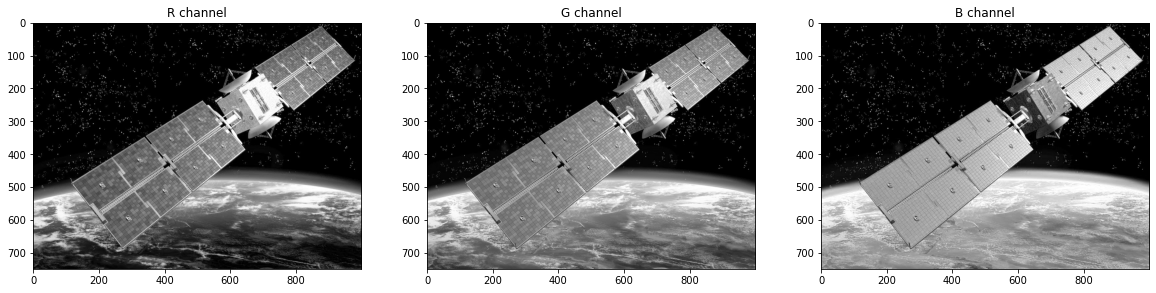

In [ ]:
# Isolate RGB channels
r = input_image[:,:,0]
g = input_image[:,:,1]
b = input_image[:,:,2] # This can also be done with r,g,b = cv2.split(input_image)

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## 3.2 Obtaining and defining image data

When you load an image with OpenCV, it's represented as a Numpy array. Numpy arrays are specifically designed for efficient array operations. While it's generally not common to access or modify individual pixels directly, there are ways to do it.

In [ ]:
# Read a single pixel
pixel = input_image[100,100]
print(pixel)

[216 226 238]


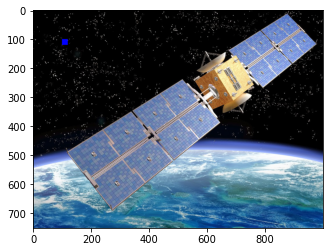

In [ ]:
# Define the value of a pixel
input_image[100,100] = [0,0,255]

# Given that changing a single pixel is sometimes unnoticeable, we will define the value of a region
input_image[100:120,100:120] = [0,0,255]

plt.imshow(input_image)

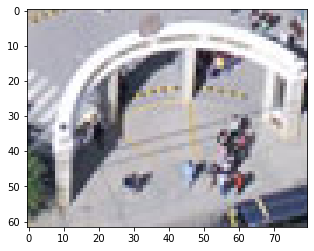

In [ ]:
# Let's see another example copying a region to another region
lobby = input_image[290:,330:410]
plt.imshow(lobby)

62
80


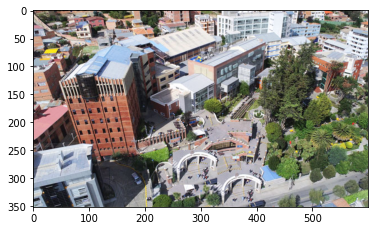

In [ ]:
# Replace a region in the image
fresh_image = cv2.imread('ucb.jpeg')
fresh_image = cv2.cvtColor(fresh_image,cv2.COLOR_BGR2RGB)

fresh_image[250:250+lobby.shape[0], 250:250+lobby.shape[1]]=lobby
print(lobby.shape[0])
print(lobby.shape[1])
plt.imshow(fresh_image)

## 3.3 Basic functions of OpenCV

OpenCV provides tools to process and analyze the content of images, including object recognition in digital photos (such as faces and figures of people, text, etc.), object  tracking, image conversion, or even machine learning methods. On this occasion, we will see the most basic methods.

### 3.3.1 Change the image size  ✅

(750, 1000, 3)


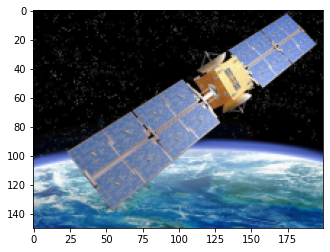

In [ ]:
import numpy as np

fresh_image=cv2.imread('satellite.jpeg')
fresh_image = cv2.cvtColor(fresh_image,cv2.COLOR_BGR2RGB)

print(fresh_image.shape)

# Copy the content of the image
new_image = np.copy(fresh_image)


# Change the size of the image
new_image = cv2.resize(new_image, (200,150), interpolation = cv2.INTER_AREA)

plt.imshow(new_image)

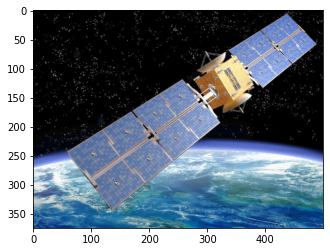

In [ ]:
# This function also allows you to define percentages with respect to the sizes
new_image = np.copy(fresh_image)
new_image2 = cv2.resize(new_image, (0,0), fx=0.5,fy=0.5)
plt.imshow(new_image2)

##3.3.2 Rotate an image

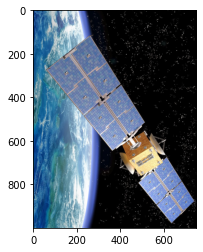

In [ ]:
new_image = np.copy(fresh_image)
image2 = cv2.rotate(new_image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image2)

If you're interested in more OpenCV functions, check out this [cheatsheet](https://github.com/a-anjos/python-opencv/blob/master/cv2cheatsheet.pdf).

# 4. Numpy
What follows is a brief introduction to Numpy, focusing on the basic data structure, the *ndarrays*. Numpy is the most important scientific package in the Python ecosystem because it provides a common data structure on which other packages rely on.

<center>
<img src='https://drive.google.com/uc?id=1lCxtr6AHg2h0-S4phI2T94131H5Lir5m' width='50%'></center>

Numpy offers a great alternative to common Python lists; for example, Numpy arrays are more compact, they allow faster read-and-write access to elements. For example, if a list of lists takes 20 MB to register an image data, a Numpy array would only require 4 MB. This is quite useful since the images are saved in large arrays.

In [ ]:
# Usually, we import Numpy as np
import numpy as np

## 4.1 Creating arrays

The array or `numpy.ndarray` is the numpy's biggest contribution. An array is a regular N-dimensional grid that is homogeneous by default (all elements are of the same type of data), continuous block of memory. You can see 3 examples in the following image.

<center>
<img src='https://drive.google.com/uc?id=1zNfxs9J6mT9wAYoOyP4fcmMBrjiCCUmQ' width='50%'></center>

Ref. https://indianaiproduction.com/python-numpy-array/

Although there are many ndarray data types (8-bit ints, 32-bit floats, 64-bit longs, string, bool), images are often saved to `int` types. Even more specific, `uint8` should always be the preferred numpy data type because images are unsigned and only contain data in the range [0,255]

In [ ]:
# Create a 2D array with floats
a = np.array([
    [1.2, 2.3, 4.0],
    [1.2, 3.4, 5.2],
    [0.0, 1.0, 1.3],
    [0.0, 1.0, 2e-1]],dtype=float)
print(a)

[[1.2 2.3 4. ]
 [1.2 3.4 5.2]
 [0.  1.  1.3]
 [0.  1.  0.2]]


In [ ]:
# Useful functions for creating arrays
b = np.zeros((3,4),dtype=np.int) # Create an array of zeros
c = np.ones((2,3,4),dtype=np.int) # Create an array of ones
d = np.full((2,2),7) # Create a constant array
e = np.eye(5) # Create a 5x5 identity matrix
f = np.random.randint((3,3)) # Create an array with random values

print("zeros: ",b)
print("ones: ",c)
print("constant array: ",d)
print("identity matrix: ", e)
print("random array: ", f)

zeros:  [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
ones:  [[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
constant array:  [[7 7]
 [7 7]]
identity matrix:  [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
random array:  [1 2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

## 4.2 Inspecting and saving arrays

In [ ]:
# Inspect properties in an array
print(a.dtype) # data type of array elements
print(a.ndim) # number of dimensions of an array
print(a.shape) # dimensions of an array
print(len(a)) # length of an array
print(a.size) # number of elements in an array

# Convert an array to a different type
g = a.astype(int)
print(g.dtype)

float64
2
(4, 3)
4
12
int64


In [ ]:
# Save an array in the hard disk
np.save("my_array",a)
!ls

my_array.npy  sample_data


In [ ]:
# Load an array from the hard disk
np.load('my_array.npy')

array([[1.2, 2.3, 4. ],
       [1.2, 3.4, 5.2],
       [0. , 1. , 1.3],
       [0. , 1. , 0.2]])

In [ ]:
# Save and load array data in text files
np.savetxt('myfile.txt',a,delimiter=',') # save csv
# !ls

m = np.loadtxt('myfile.txt',delimiter=',') # load txt

## 4.3 Arithmetic and boolean operations



In [ ]:
arrA = np.array([
    [1.2, 2.3, 4.0],
    [1.2, 3.4, 5.2],
    [0.0, 1.0, 1.3],
    [0.0, 1.0, 2e-1]])
print(arrA)

# Basic operations with an array and a constant value
arrA += 2.5
print(arrA)

arrA -= 2.5
print(arrA)

arrA /= 2.5
print(arrA)

arrA *= 2.5
print(arrA)

[[1.2 2.3 4. ]
 [1.2 3.4 5.2]
 [0.  1.  1.3]
 [0.  1.  0.2]]
[[3.7 4.8 6.5]
 [3.7 5.9 7.7]
 [2.5 3.5 3.8]
 [2.5 3.5 2.7]]
[[1.2 2.3 4. ]
 [1.2 3.4 5.2]
 [0.  1.  1.3]
 [0.  1.  0.2]]
[[0.48 0.92 1.6 ]
 [0.48 1.36 2.08]
 [0.   0.4  0.52]
 [0.   0.4  0.08]]
[[1.2 2.3 4. ]
 [1.2 3.4 5.2]
 [0.  1.  1.3]
 [0.  1.  0.2]]


In [ ]:
# Basic operations between two arrays
arrB = a.astype(int)
arrC = np.array([
    [3, 5, 1],
    [4, 2, 2],
    [3, 1, 0],
    [5, 2, 1]])

print(arrC-arrB)
print(arrC+arrB)
print(arrC*arrB)
print(arrC/arrB)

# Additional functions for arithmetic operations between arrays
np.subtract(arrC,arrB)
np.add(arrC,arrB)
np.multiply(arrC,arrB)
np.divide(arrC,arrB)

[[ 2  3 -3]
 [ 3 -1 -3]
 [ 3  0 -1]
 [ 5  1  1]]
[[4 7 5]
 [5 5 7]
 [3 2 1]
 [5 3 1]]
[[ 3 10  4]
 [ 4  6 10]
 [ 0  1  0]
 [ 0  2  0]]
[[3.         2.5        0.25      ]
 [4.         0.66666667 0.4       ]
 [       inf 1.         0.        ]
 [       inf 2.                inf]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


array([[3.        , 2.5       , 0.25      ],
       [4.        , 0.66666667, 0.4       ],
       [       inf, 1.        , 0.        ],
       [       inf, 2.        ,        inf]])

In [ ]:
# Logical operations
print(arrB == arrC)
print(arrB > arrC)

[[False False False]
 [False False False]
 [False  True False]
 [False False False]]
[[False False  True]
 [False  True  True]
 [False False  True]
 [False False False]]


## 4.4 Subsets, slicing, indexing, merging, array splitting

In [ ]:
print(arrB)

arrB[2] # Select element at 2nd index

[[1 2 4]
 [1 3 5]
 [0 1 1]
 [0 1 0]]


array([0, 1, 1])

In [ ]:
arrB[2,1]=15
print(arrB)

[[ 1  2  4]
 [ 1  3  5]
 [ 0 15  1]
 [ 0  1  0]]


In [ ]:
arrB[1,2] # Select the element in row 1 column 2 (equivalent to arrb[1][2])

5

In [ ]:
arrB[0:2,1] # select items in rows 0 and 1 in column 1

array([2, 3])

In [ ]:
arrB[:1] # Select all elements in row 0

array([[1, 2, 4]])

In [ ]:
arrB[:,2] # Select all items in column 2

array([4, 5, 1, 0])

In [ ]:
# Concatenate arrays
arrD = np.concatenate((arrB, arrC),axis=0)
print(arrD)

[[ 1  2  4]
 [ 1  3  5]
 [ 0 15  1]
 [ 0  1  0]
 [ 3  5  1]
 [ 4  2  2]
 [ 3  1  0]
 [ 5  2  1]]


In [ ]:
# Stack arrays vertically
arrE = np.vstack((arrB, arrC))
print(arrE)

# Stack arrays horizontally
arrF = np.hstack((arrB, arrC))
print(arrF)

[[ 1  2  4]
 [ 1  3  5]
 [ 0 15  1]
 [ 0  1  0]
 [ 3  5  1]
 [ 4  2  2]
 [ 3  1  0]
 [ 5  2  1]]
[[ 1  2  4  3  5  1]
 [ 1  3  5  4  2  2]
 [ 0 15  1  3  1  0]
 [ 0  1  0  5  2  1]]


In [ ]:
np.vsplit(arrB, 2) # Split array vertically at second index

[array([[1, 2, 4],
        [1, 3, 5]]), array([[ 0, 15,  1],
        [ 0,  1,  0]])]

# **Exercises - Part 1:** NumPy

1. Create a method that converts a series of amounts of bolivianos entered by keyboard to another currency, these can be dollars, Chinese yuans or pounds. The method should have as parameters, the amount of dollars and the currency to be converted, which will be a string. The result will not return any value, instead it will display a message indicating the change per input value. You must use NumPy arrays to save and process the amounts.

The currency exchange are:

* 0.11 pounds is 1Bs.
* 1.03 Chinese yuans is 1Bs.
* 0.13 Eur is 1Bs.

2. Make a program using NumPy that displays a matrix with the multiplication table of the numbers 2 to 6
(the first 10 terms). That is, it shows:


* Table 2: 2 4 6 8 10 12 14 16 18 20
* Table of 3: 3 6 9 12 15 18 21 24 27 30
* Table of 4: 4 8 12 16 20 24 28 32 36 40
* Table of 5: 5 10 15 20 25 30 35 40 45 50
* Table of 6: 6 12 18 24 30 36 42 48 54 60

3. Inside NumPy arrays, save the names of n products, and their categories. Also, generate random prices for the products in a store.  Implement a method in Python with the following options:

* Obtain the average price given a category.

* Sort the products from lowest to highest price and show it already ordered in a different array.

* Count how many products have a price below the average.

* Indicate if there is any product that costs exactly the value of the calculated average and show the position in which it is located.





# **Exercises - Part 2:** Grayscale Puzzles  

The following exercises require you to implement methods, OpenCV, and Numpy methods in a practical way with image(s) of your preference. It will be important to obtain their grayscale version first. Display the final images with `plt.imshow(..., cmap="gray")`.   

1. Create a function to generate a single image with a grid of images, which should be passed as a list of images. Your function should also ask for the number of rows and columns of the grid. If the length of the list of images passed to the function does not match the rows and columns, your function should include black images by default.

2. Write a function to split an image into equal parts and disorder them to finally include them inside a new image with the same dimensions. You can explore the functions `np.split()` and `np.array_split()`.

3. Create a function to normalize an image. The function should ask for an image and the expected new size (defined with width and height) of the image. If the current image's dimensions does not shape with the provided dimensions, add padding (a set of black lines) to the sides. Most importantly, the image should keet its aspect ratio, meaning that it should not be enlarged vertically or horizontally.


# **Exercises - Part 3:** RGB images

1. Code a function to shuffle the channels of an image randomly. The function should ask the user to upload a new image with `files.upload()`. Show the initial and final image with `plt.subplots()`.

2. Program a function that blends an image uploaded by the user with an image representing a special weather condition.
You can define a series of default images per weather condition. The method should ask the user for image, the blending grade (in the range of 0 and 1), and the weather condition. Also, the output image should maintain the base image's dimensions. This time, you can investigate an OpenCV function to blend the images. See the following examples.

<center>
<img src='https://drive.google.com/uc?id=1xMLMYwMNeSPUuJ_ZhjlnKr-i5WHmfG7n' width='20%'>
</center>

3. Create a function that mirrors an RGB image without using predefined functions. The user should pass a parameter to define if the image has to be mirrored horizontally or vertically.


# **Exercises - Part 4:** Image Noise

Noise is a common problem that affects images with a constant pattern. Salt & pepper noise, Gaussian noise and ISO noise are amongst some of the commonest types caused by faulty cameras.

<center>
<img src='https://drive.google.com/uc?id=192kDS9p0afLyW4Nq5-QQNMGat_Tw7G2Z' width='40%'>
</center>

This time, you will have to investigate and code functions  to generate certain types of noise over an image. Investigate the use of Colab Forms to select a category and mimic the behaviour shown in the following examples:

- Dropout
<center>
<img src='https://drive.google.com/uc?id=1ttUa8qZ7MxijANlnIyOsKlLOFpdM__4X' width='10%'>
</center>

- Gaussian noise
<center>
<img src='https://drive.google.com/uc?id=14PwZUFcZQvv2YrNoWGOLN6nGIIkBGpGd' width='10%'>
</center>

- Salt and Pepper noise
<center>
<img src='https://drive.google.com/uc?id=1QkV7DOx4I7Hym3mv92-X8Igpv3usYX3i' width='10%'>
</center>


Your function should show the original image and the noisy sample side by side. Also, the function should be able to process grayscale and RGB images.